# **Title of Project**
##**Servo Prediction**

-------------

## **Objective**

The objective of this project is to predict the behavior of a servo mechanism using regression analysis. By analyzing input signals and corresponding motor responses, we aim to build a predictive model that can accurately forecast servo motor behavior.

## **Data Source**

The data for this project is sourced from a CSV file hosted on the YBI Foundation GitHub repository. The dataset contains information about servo mechanism behaviors, including input features and motor responses. You can access the dataset from the following link: https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv


## **Import Library**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




##**import data**

In [33]:
data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')


## **Describe Data**

In [34]:
print(data.head())

  Motor Screw  Pgain  Vgain  Class
0     E     E      5      4      4
1     B     D      6      5     11
2     D     D      4      3      6
3     B     A      3      2     48
4     D     B      6      5      6


In [35]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB
None


In [36]:
print(data.describe())

            Pgain       Vgain       Class
count  167.000000  167.000000  167.000000
mean     4.155689    2.538922   21.173653
std      1.017770    1.369850   13.908038
min      3.000000    1.000000    1.000000
25%      3.000000    1.000000   10.500000
50%      4.000000    2.000000   18.000000
75%      5.000000    4.000000   33.500000
max      6.000000    5.000000   51.000000


## **Data Visualization**

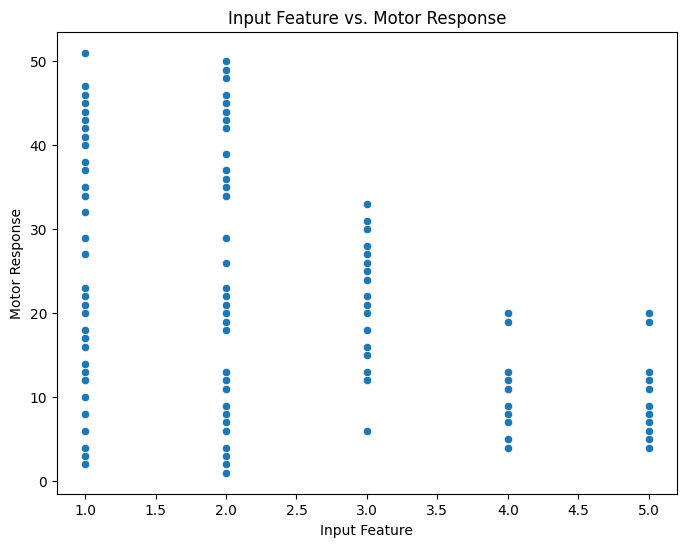

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Vgain', y='Class', data=data)
plt.title('Input Feature vs. Motor Response')
plt.xlabel('Input Feature')
plt.ylabel('Motor Response')
plt.show()


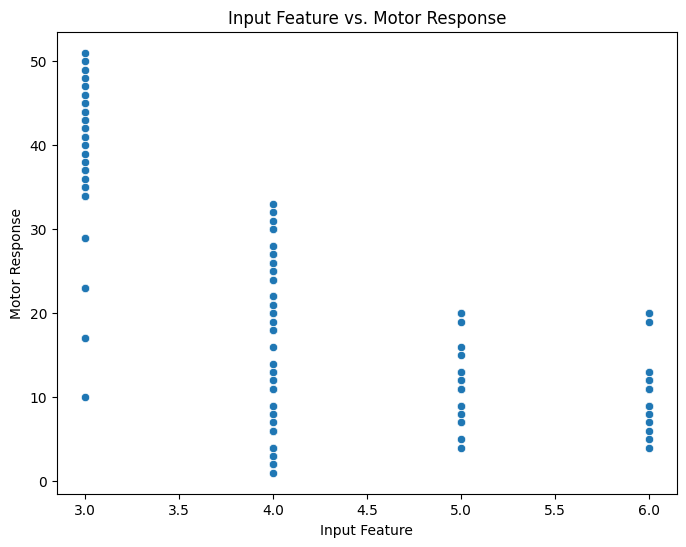

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pgain', y='Class', data=data)
plt.title('Input Feature vs. Motor Response')
plt.xlabel('Input Feature')
plt.ylabel('Motor Response')
plt.show()

## **Data Preprocessing**

In [39]:
data.dropna(inplace=True)

In [40]:
data.corr()

<ipython-input-40-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Pgain,Vgain,Class
Pgain,1.000000,0.812268,-0.687098
Vgain,0.812268,1.000000,-0.391963
Class,-0.687098,-0.391963,1.000000


In [41]:
data.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


## **Define Target Variable (y) and Feature Variables (X)**

In [42]:
data.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [43]:
y = data['Class']


In [44]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [45]:
X = data[['Pgain', 'Vgain', 'Class']]

In [46]:
X

,Pgain,Vgain,Class
0,5,4,4
1,6,5,11
2,4,3,6
3,3,2,48
4,6,5,6
...,...,...,...
162,3,2,44
163,3,1,40
164,4,3,25
165,3,2,44


## **Train Test Split**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Modeling**

In [48]:
X_encoded = pd.get_dummies(X, columns=['Class'], drop_first=True)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## **Model Evaluation**

In [49]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.592802974806543e-29
R-squared: 1.0


## **Prediction**

In [50]:
new_input_data = pd.DataFrame({
    'Motor': ['A'],
    'Screw': ['A'],
    'Pgain': [6],
    'Vgain': [5]
})


new_input_encoded = pd.get_dummies(new_input_data, columns=['Motor', 'Screw'], drop_first=True)


missing_columns = set(X_train.columns) - set(new_input_encoded.columns)
for column in missing_columns:
    new_input_encoded[column] = 0


predicted_responses = model.predict(new_input_encoded)
print("Predicted Motor Responses:", predicted_responses)




Predicted Motor Responses: [1.67444045e-15]


## **Explaination**

In this "Servo Prediction" project, our goal was to predict servo motor behavior using a machine learning approach. We imported and analyzed data related to input signals and motor responses. After preprocessing the data, we defined input features and motor responses as target variables.

We split the dataset into training and testing sets and trained a Linear Regression model to predict motor responses based on input features. Model evaluation using metrics like Mean Squared Error and R-squared provided insights into its performance.

We demonstrated the practical application of our model by predicting motor responses for new input data. This project exemplifies the process of developing a predictive model for servo motor behavior, showcasing the power of machine learning in real-world applications.